# Task 3: Simulation of a GBS experiment

A template code for calculating a vibronic spectrum of $V_3$ using a sampling method, simulating a Gaussian Boson Sampling experiment.

Input Parameters.

Note: "Strawberry Fields" is a code created by Xanadu and is the driver behind GBS. This can be installed using **pip**, but see install instructions in the <a href="https://github.com/CDL-Quantum/CohortProject_2020/blob/master/Project_3_Franck_Condon_Factors/Project3_LandingPage.pdf"> Project 3 Landing Page</a>. Plotly is a nice plotting code, but is not necessary if you wish to use one of your choice.

In [1]:
from sys import argv
from strawberryfields.apps import vibronic, data, sample, plot
import numpy as np
from plotly import offline
import numpy as np
import matplotlib.pyplot as plt

Variables.

Note: The **inputfile** for $V_3$ is what you will have to create to run this script.

In [2]:
inputfile = open("V3_input_task3.txt", "r")

N=int(inputfile.readline())     #Number of Atoms
nmodes=3*N-6                    #Number of Modes

w=np.zeros(nmodes,float)        #vib. frequencies of ground electronic state
wp=np.zeros(nmodes,float)       #vib. frequencies of excited electronic state
Ud=np.zeros((nmodes,nmodes),float)   #Duschinsky Matrix
delta=np.zeros(nmodes,float)    #Displacement Vector

T = 500  # temperature

Read in Parameters.

Note: This is a suggested format for reading the **inputfile** that you create. However, feel free to modify it for your convenience.

In [3]:
for i in range(nmodes):
    w[i]=float(inputfile.readline())
for i in range(nmodes):
    wp[i]=float(inputfile.readline())
for i in range(nmodes):
    for j in range(nmodes):
        Ud[i,j]=float(inputfile.readline())

for i in range(nmodes):
    delta[i]=float(inputfile.readline())

In [4]:
print('N: ', N)
print('nmodes: ', nmodes)
print('w: ',w)
print('wp: ',wp)
print('Ud: ',Ud)
print('delta: ',delta)

N:  3
nmodes:  3
w:  [255.  255.  420.8]
wp:  [261.9 263.3 421.8]
Ud:  [[ 7.41673e-01 -6.70761e-01  7.59511e-04]
 [-6.70759e-01 -7.41673e-01 -1.49096e-03]
 [ 1.56339e-03  5.96355e-04 -9.99999e-01]]
delta:  [-2.05330e-04 -7.33908e-04 -1.08223e+00]


Use "Strawberry Fields" to calculate GBS Parameters based on the frequencies, Duschinsky matrix, and temperature that was provided as input.

In [5]:
t, U1, r, U2, alpha = vibronic.gbs_params(w, wp, Ud, delta, T)

Generate Samples and Calculate Energies of Samples. Then plot the Spectrum.

Note: The number of samples may be changed if the spectrum is not converged.

In [6]:
nr_samples = [10, 100, 500, 1000, 20000]
for n_sam in nr_samples:
    s = sample.vibronic(t, U1, r, U2, alpha, n_sam)
    e = vibronic.energies(s, w, wp)
    spectrum = plot.spectrum(e, gamma=50, xmin=-300, xmax=2000)
    offline.plot(spectrum, filename=f"{n_sam}_sample_spectrum.html")

Now lets compare to the V3.specs.out file we compiled from the FC.cxx program. 

First lets read in the file and plot the results.

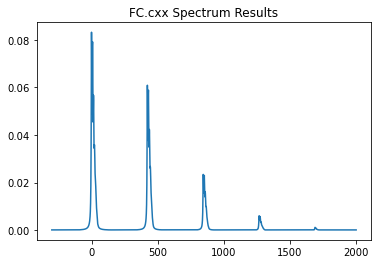

In [6]:
lineCount = 0
with open("V3_specs_task3.txt", "r") as f:
    for i, l in enumerate(f):
        lineCount += 1

inputSpecs = open("V3_specs_task3.txt", "r")

x = []
y = []

for i in range(lineCount):
    line = inputSpecs.readline().split(' ')
    x.append(float(line[0]))
    y.append(float(line[2]))
    
plt.title('FC.cxx Spectrum Results')
plt.plot(x,y)

To compare FC.cxx and GBS outputs and see if they line up in the x-axis we scale the FC.cxx values up inorder to make it more visually clear.

In [7]:
y = [i*1000 for i in y]

Lets use GBS for 500 samples, as this showed fairly good convergence. 

In [8]:
s = sample.vibronic(t, U1, r, U2, alpha, 500)
e = vibronic.energies(s, w, wp)
spectrum = plot.spectrum(e, gamma=50, xmin=-300, xmax=2000)

Now we plot the results and can see that both plots line up as expected with a slight offset. 

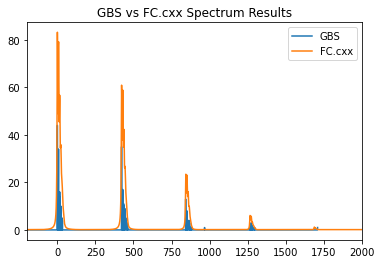

In [9]:
e_h, bins = np.histogram(e, bins=3000)
plt.title('GBS vs FC.cxx Spectrum Results')
plt.xlim(-200, 2000) 
gbs, = plt.plot(bins[:-1],e_h, label='GBS')
fc, = plt.plot(x, y, label='FC.cxx')
plt.legend(handles=[gbs, fc]) 